In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [2]:
data = pd.read_csv("D:/Machine_Learning_Data/movie_metadata.csv")

In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
data.shape, type(data)

((5043, 28), pandas.core.frame.DataFrame)

In [9]:
data.head()[:2]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [12]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

##### Getting the Non-object elements

In [5]:
X_data = data.dtypes[data.dtypes!=object].index
X_train = data[X_data]
X_train.head()[:2]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0


In [6]:
X_train.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


##### Finding Columns with Null values

In [7]:
X_train.isnull().sum()

num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

###### Filling all Null values

In [8]:
X_train = X_train.fillna(0)
columns = X_train.columns.tolist()
Y = X_train['imdb_score']

###### Correlation Matrix

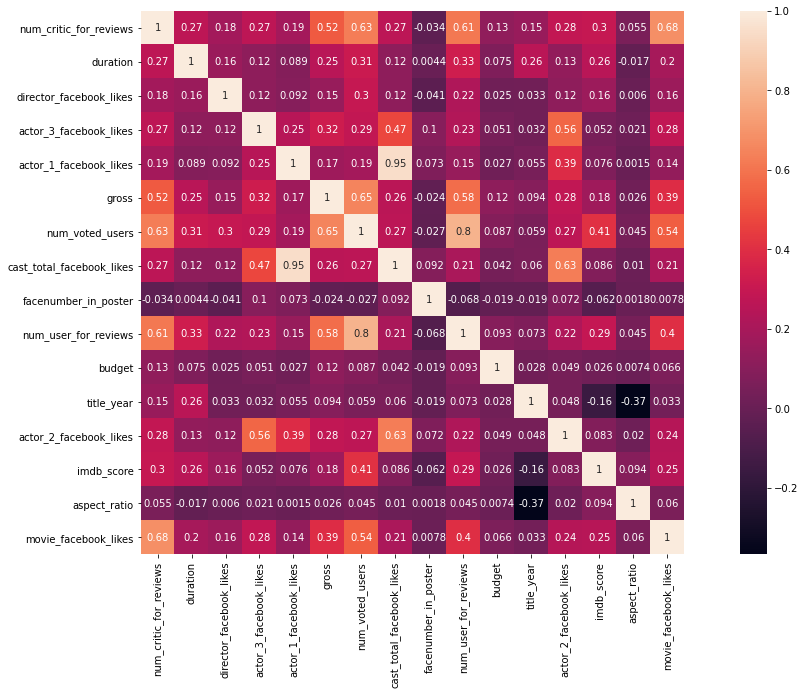

In [9]:
mat_corr = X_train.corr(method = 'pearson')
plt.figure(figsize = (20,10))
sns.heatmap(mat_corr,vmax = 1 ,square = True, annot = True )

In [10]:
X_Train = X_train.values
X_Train = np.asarray(X_Train)

## Scaling Arrays

X_scaled = StandardScaler().fit_transform(X_Train)

In [11]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_scaled)

Text(0, 0.5, 'Cumulative explained variance')

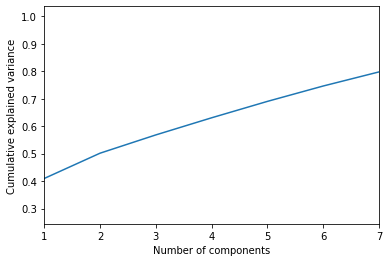

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(1,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

We choose 5 components as the first 5 components explain 70% of the Variance.

(-2.0, 2.0)

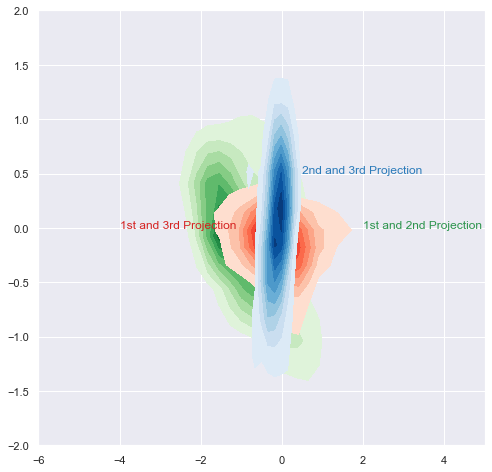

In [13]:
from sklearn.decomposition import PCA
sklearn_pca=PCA(n_components=5)
X_Train=sklearn_pca.fit_transform(X_scaled)

sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(X_Train[:,0], X_Train[:,1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,1], X_Train[:,2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,2], X_Train[:,3], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)

###### Preparing Train and Test sets

In [14]:
number_of_samples = len(Y)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.75)
x_train = X_Train[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
x_test = X_Train[random_indices[num_training_samples:]]
y_test = Y[random_indices[num_training_samples:]]
y_Train = list(y_train)

###### using sklearn

In [148]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train , y_test = train_test_split(X_Train, Y, test_size = 0.25, random_state =42)

#### Ridge Regression

### Repeat this calcul

In [23]:
###### the propblem here is in the abs method


model = linear_model.Ridge()
model.fit(x_train, y_train)
y_predict = model.predict(x_train)


error = 0
for i in range(len(y_Train)):
    error += abs(y_Train[i] - y_predict[i]/y_Train[i])
train_error_ridge = error/len(y_Train)*100
print("train error = {}".format(train_error_ridge)+"percent in Ridge Regression")

y_predict_test = model.predict(x_test)
y_test_r = list(y_test)

error = 0
for i in range(len(y_test)):
    error += abs( y_test_r[i]- y_predict[i]/ y_test_r[i])
test_error_ridge = error / len(y_test)*100
print("Test error = {}".format(test_error_ridge)+"percent in Ridge Regression ")


train error = 542.6054983360572percent in Ridge Regression
Test error = 539.5247479881451percent in Ridge Regression 


### his method

In [55]:
y_predict=model.predict(x_train)

error=0
for i in range(len(y_Train)):
    error+=(abs(y_Train[i]-y_predict[i])/y_Train[i])
train_error_ridge=error/len(y_Train)*100
print("Train error = "'{}'.format(train_error_ridge)+" percent in Ridge Regression")

Y_test=model.predict(x_test)
y_Predict=list(y_test)

error=0
for i in range(len(y_test)):
    error+=(abs(y_Predict[i]-Y_test[i])/y_Predict[i])
test_error_ridge=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_ridge)+" percent in Ridge Regression")

Train error = 10.122547698768317 percent in Ridge Regression
Test error = 9.857755602983795 percent in Ridge Regression


Text(0.5, 1.0, 'Residual plot in Ridge Regression')

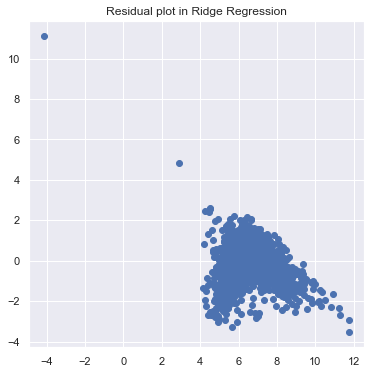

In [34]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
data_pred = pd.DataFrame({"preds": model.predict(x_train), "true": y_train})
data_pred['resid'] = data_pred['true'] - data_pred['preds']
plt.scatter('preds', 'resid', data=data_pred)
plt.title('Residual plot in Ridge Regression')

Knn algorithm

In [54]:
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform')
knn.fit(x_train, y_train)
y1_knn = knn.predict(x_train)
y1_knn = list(y1_knn)

error = 0

for i in range(len(y_train)):
    error+=abs(y1_knn[i]-y_Train[i])/y_Train[i]
train_error_knn = error / len(y_train)*100
print('train error = {}'.format(train_error_knn)+"  percent in Knn Algorithm")


y2_knn = knn.predict(x_test)
y2_knn = list(y2_knn)

y_Test =list(y_test)


error = 0

for i in range(len(y_test)):
    error += abs(y2_knn[i]- y_Test[i])/y_Test[i]
test_error_knn = error / len(y_train)*100
print("test error = {}".format(test_error_knn)+" percent in Knn Algorithm")

train error = 3.9546122029988506  percent in Knn Algorithm
test error = 1.5190420261785358 percent in Knn Algorithm


Text(0.5, 1.0, 'Residual plot in Knn Algorithm')

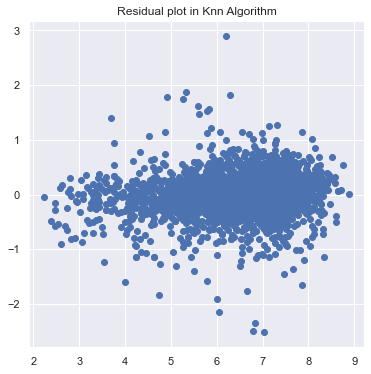

In [50]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
data_pred = pd.DataFrame({"preds": knn.predict(x_train), "true": y_train})
data_pred['resid'] = data_pred['true']-data_pred['preds']
plt.scatter('preds', 'resid', data= data_pred)
plt.title('Residual plot in Knn Algorithm')

#### Bayesian Regression

In [41]:
reg = linear_model.BayesianRidge()
reg.fit(x_train, y_train)
y1_reg = reg.predict(x_train)
y1_reg = list(y1_reg)
y2_reg = reg.predict(x_test)
y2_reg = list(y2_reg)

error = 0
for i in range( len(y_train)):
    error+=abs(y1_reg[i]-y_Train[i])/y_Train[i]
train_error_bay = error / len(y_train)*100
print("train error = {}".format(train_error_bay)+'percent in Bay Regression')


error = 0
for i in range( len(y_test)):
    error+=abs(y2_reg[i]-y_Test[i])/y_Test[i]
test_error_bay = error / len(y_test)*100
print("test error = {}".format(test_error_bay)+'percent in Bay Regression')

train error = 10.125748935310613percent in Bay Regression
test error = 9.860835906295872percent in Bay Regression


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Bayesian Regression')

<Figure size 432x432 with 0 Axes>

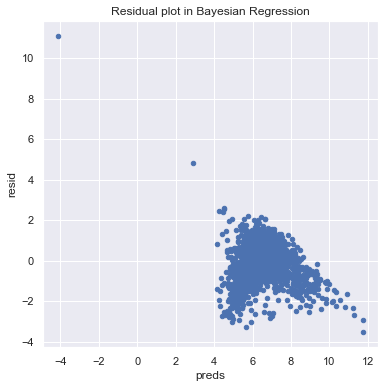

In [44]:
plt.figure(figsize =(6.0,6.0))
data_pred = pd.DataFrame({"preds":reg.predict(x_train), "true": y_train})
data_pred['resid'] = data_pred['true']-data_pred['preds']
data_pred.plot(x = 'preds', y= 'resid', kind = 'scatter')
plt.title('Residual plot in Bayesian Regression')

##### Decision Tree Regressor

In [45]:
dec = tree.DecisionTreeRegressor()
dec.fit(x_train, y_train)
y1_dec = dec.predict(x_train)
y1_dec = list(y1_dec)
y2_dec = dec.predict(x_test)
y2_dec = list(y2_dec)



error=0
for i in range(len(y_train)):
    error+=(abs(y1_dec[i]-y_Train[i])/y_Train[i])
train_error_tree=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_tree)+" percent"+" in Decision Tree Regressor")



error=0
for i in range(len(y_test)):
    error+=(abs(y2_dec[i]-y_Test[i])/y_Test[i])
test_error_tree=error/len(y_Test)*100
print("Test error = "+'{}'.format(test_error_tree)+" percent"+" in Decision Tree Regressor")


Train error = 5.518582131184118e-16 percent in Decision Tree Regressor
Test error = 6.503623957466879 percent in Decision Tree Regressor


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Decision Tree')

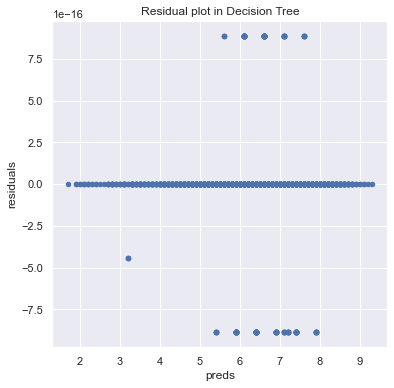

In [46]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":dec.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Decision Tree")

#### SVM

In [47]:
svm_reg = svm.SVR()
svm_reg.fit(x_train, y_train)
y1_svm=svm_reg.predict(x_train)
y1_svm=list(y1_svm)
y2_svm=svm_reg.predict(x_test)
y2_svm=list(y2_svm)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_svm[i]-y_Train[i])/y_Train[i])
train_error_svm=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_svm)+" percent"+" in SVM Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_svm[i]-y_Test[i])/y_Test[i])
test_error_svm=error/len(y_Test)*100
print("Test error = "'{}'.format(test_error_svm)+" percent in SVM Regressor")

Train error = 4.056760887922095 percent in SVM Regressor
Test error = 4.219996688218435 percent in SVM Regressor


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in SVM')

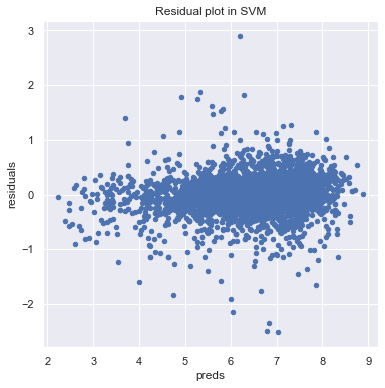

In [48]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in SVM")

In [57]:
train_errors = [train_error_ridge, train_error_knn, train_error_bay, train_error_tree, train_error_svm]
test_errors = [test_error_ridge, test_error_knn, test_error_bay, test_error_tree, test_error_svm]
data_dict = {'Train_error': train_errors, 'Test_error': test_errors}
models_names = ['Ridge', 'KNN', 'Bayesian', 'D-Tree', 'SVM']
data_comp= pd.DataFrame(data=data_dict, index= models_names)
data_comp

,Train_error,Test_error
Ridge,1.012255e+01,9.857756
KNN,3.954612e+00,1.519042
Bayesian,1.012575e+01,9.860836
D-Tree,5.518582e-16,6.503624
SVM,4.056761e+00,4.219997


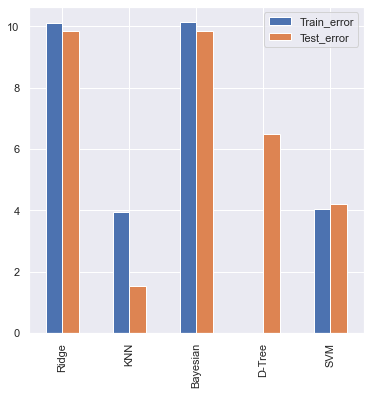

In [58]:
data_comp.plot(kind='bar')



Seems that KNN turned out to be the winner.Its because of the fact that there are very large number f data points and and also features are highly continuous Moreover the dimentionality of the processed data is not too high